<center><h1>Qi_Hui_HW6</h1></center>

Name: Hui Qi
<br>
Github Username: yufeifeiqiqi
<br>
USC ID: 3206742781

## I want to use one late day of my remaining 5 late days.

## 1. Tree-Based Methods

Import packages

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import xgboost as xgb


from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import roc_auc_score, roc_curve, auc

import imblearn
from imblearn.over_sampling import SMOTE
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

### (a) Download the APS Failure data

In [8]:
# https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
test_df = pd.read_csv('../data/aps_failure_test_set.csv', skiprows = 20, na_values = 'na')
train_df = pd.read_csv('../data/aps_failure_training_set.csv', skiprows = 20, na_values = 'na')

train_df

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,153002,NaN,6.640000e+02,186.0,0.0,0.0,0.0,0.0,0.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,neg,2286,NaN,2.130707e+09,224.0,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
59997,neg,112,0.0,2.130706e+09,18.0,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
59998,neg,80292,NaN,2.130706e+09,494.0,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


In [6]:
test_df

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0,20,12,0,0,0,0,0,...,1098,138,412,654,78,88,0,0,0,0
1,neg,82,0,68,40,0,0,0,0,0,...,1068,276,1620,116,86,462,0,0,0,0
2,neg,66002,2,212,112,0,0,0,0,0,...,495076,380368,440134,269556,1315022,153680,516,0,0,0
3,neg,59816,na,1010,936,0,0,0,0,0,...,540820,243270,483302,485332,431376,210074,281662,3232,0,0
4,neg,1814,na,156,140,0,0,0,0,0,...,7646,4144,18466,49782,3176,482,76,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,neg,81852,na,2130706432,892,0,0,0,0,0,...,632658,273242,510354,373918,349840,317840,960024,25566,0,0
15996,neg,18,0,52,46,8,26,0,0,0,...,266,44,46,14,2,0,0,0,0,0
15997,neg,79636,na,1670,1518,0,0,0,0,0,...,806832,449962,778826,581558,375498,222866,358934,19548,0,0
15998,neg,110,na,36,32,0,0,0,0,0,...,588,210,180,544,1004,1338,74,0,0,0


In [60]:
X_train = train_df.iloc[:,1:]
y_train = train_df.iloc[:,0]


In [14]:
X_test = test_df.iloc[:,1:]
y_test = test_df.iloc[:,0]


### (b) Data Preparation

#### (i) Research what types of techniques are usually used

Next or Previous Value<br>
K Nearest Neighbors<br>
Maximum or Minimum Value<br>
Missing Value Prediction<br>
Most Frequent Value<br>
Average or Linear Interpolation<br>
Mean or Moving Average or Median Value<br>
Fixed Value<br>

Reference: https://www.simplilearn.com/data-imputation-article

In [84]:
# https://scikit-learn.org/stable/modules/impute.html
# https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

# Replace missing values using a mean along each column
# get the imputation statistics using the training data 
# and then use those statistics to impute both the train and test sets. 

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(X_train)

X_train = pd.DataFrame(imp_mean.transform(X_train))
X_test = pd.DataFrame(imp_mean.transform(X_test))
X_train

,0,1,2,3,4,5,6,7,8,9,...,160,161,162,163,164,165,166,167,168,169
0,76698.0,0.713189,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058.0,0.713189,0.000000e+00,190620.639314,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040.0,0.713189,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,12.0,0.000000,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,60874.0,0.713189,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,153002.0,0.713189,6.640000e+02,186.000000,0.0,0.0,0.0,0.0,0.0,2564.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,2286.0,0.713189,2.130707e+09,224.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
59997,112.0,0.000000,2.130706e+09,18.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
59998,80292.0,0.713189,2.130706e+09,494.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


In [86]:
#X_train.isnull().values.any()

#### (ii) Calculate the coefficient of variation

In [55]:
# https://stackoverflow.com/questions/42754627/coefficient-of-variation-and-numpy


cv =  lambda x: np.std(x) / np.mean(x)
var = np.apply_along_axis(cv, axis=1, arr = np.array(X_train).T)

#var
var_df = pd.DataFrame(var, columns = ['CV'])
var_df


,CV
0,2.450917
1,2.328381
2,2.169748
3,183.846088
4,23.190743
...,...
165,4.962441
166,3.221983
167,5.626932
168,47.124560


#### (iii) Plot a correlation matrix

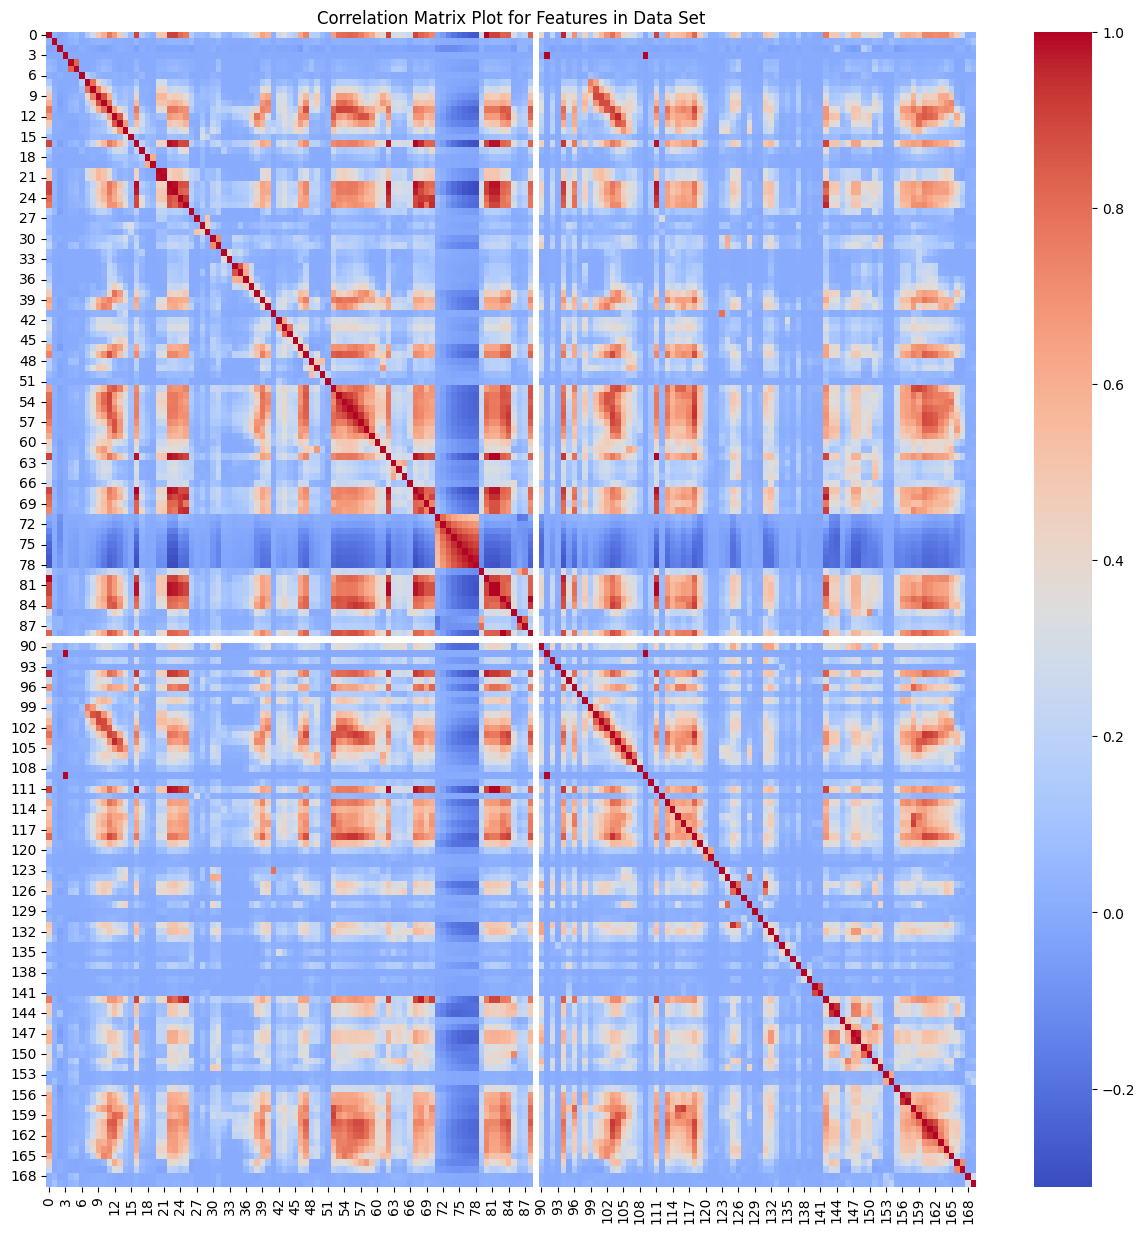

In [30]:
# # https://seaborn.pydata.org/generated/seaborn.heatmap.html
corr_matrix = X_train.corr()
corr_matrix

plt.subplots(figsize=(15, 15))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title("Correlation Matrix Plot for Features in Data Set")
plt.show()


#### (iv) Make scatter plots and box plots

In [56]:

threshold = math.floor(pow(170,0.5))


print('feature number is', threshold)
sorted_var = var_df.sort_values('CV', ascending=False)
sorted_var

# get first 13 features from threshold
features = sorted_var[:threshold].T
features


feature number is 13


,122,91,109,3,136,138,6,27,41,51,19,29,93
CV,235.275644,184.231557,183.947485,183.846088,114.984033,109.646371,91.877799,86.416184,83.785365,76.967337,74.526067,68.159986,58.267743


In [57]:
train_features = X_train.iloc[:, features.columns]
train_features

,122,91,109,3,136,138,6,27,41,51,19,29,93
0,0.0,2.000000,220.000000,280.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.0,190221.810984,190515.566938,190620.639314,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000443
2,0.0,0.000000,0.000000,100.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,2.000000,2.000000,66.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.000000,202.000000,458.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.000000,224.000000,186.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
59996,0.0,2.000000,0.000000,224.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
59997,0.0,2.000000,0.000000,18.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
59998,0.0,2.000000,580.000000,494.000000,190.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


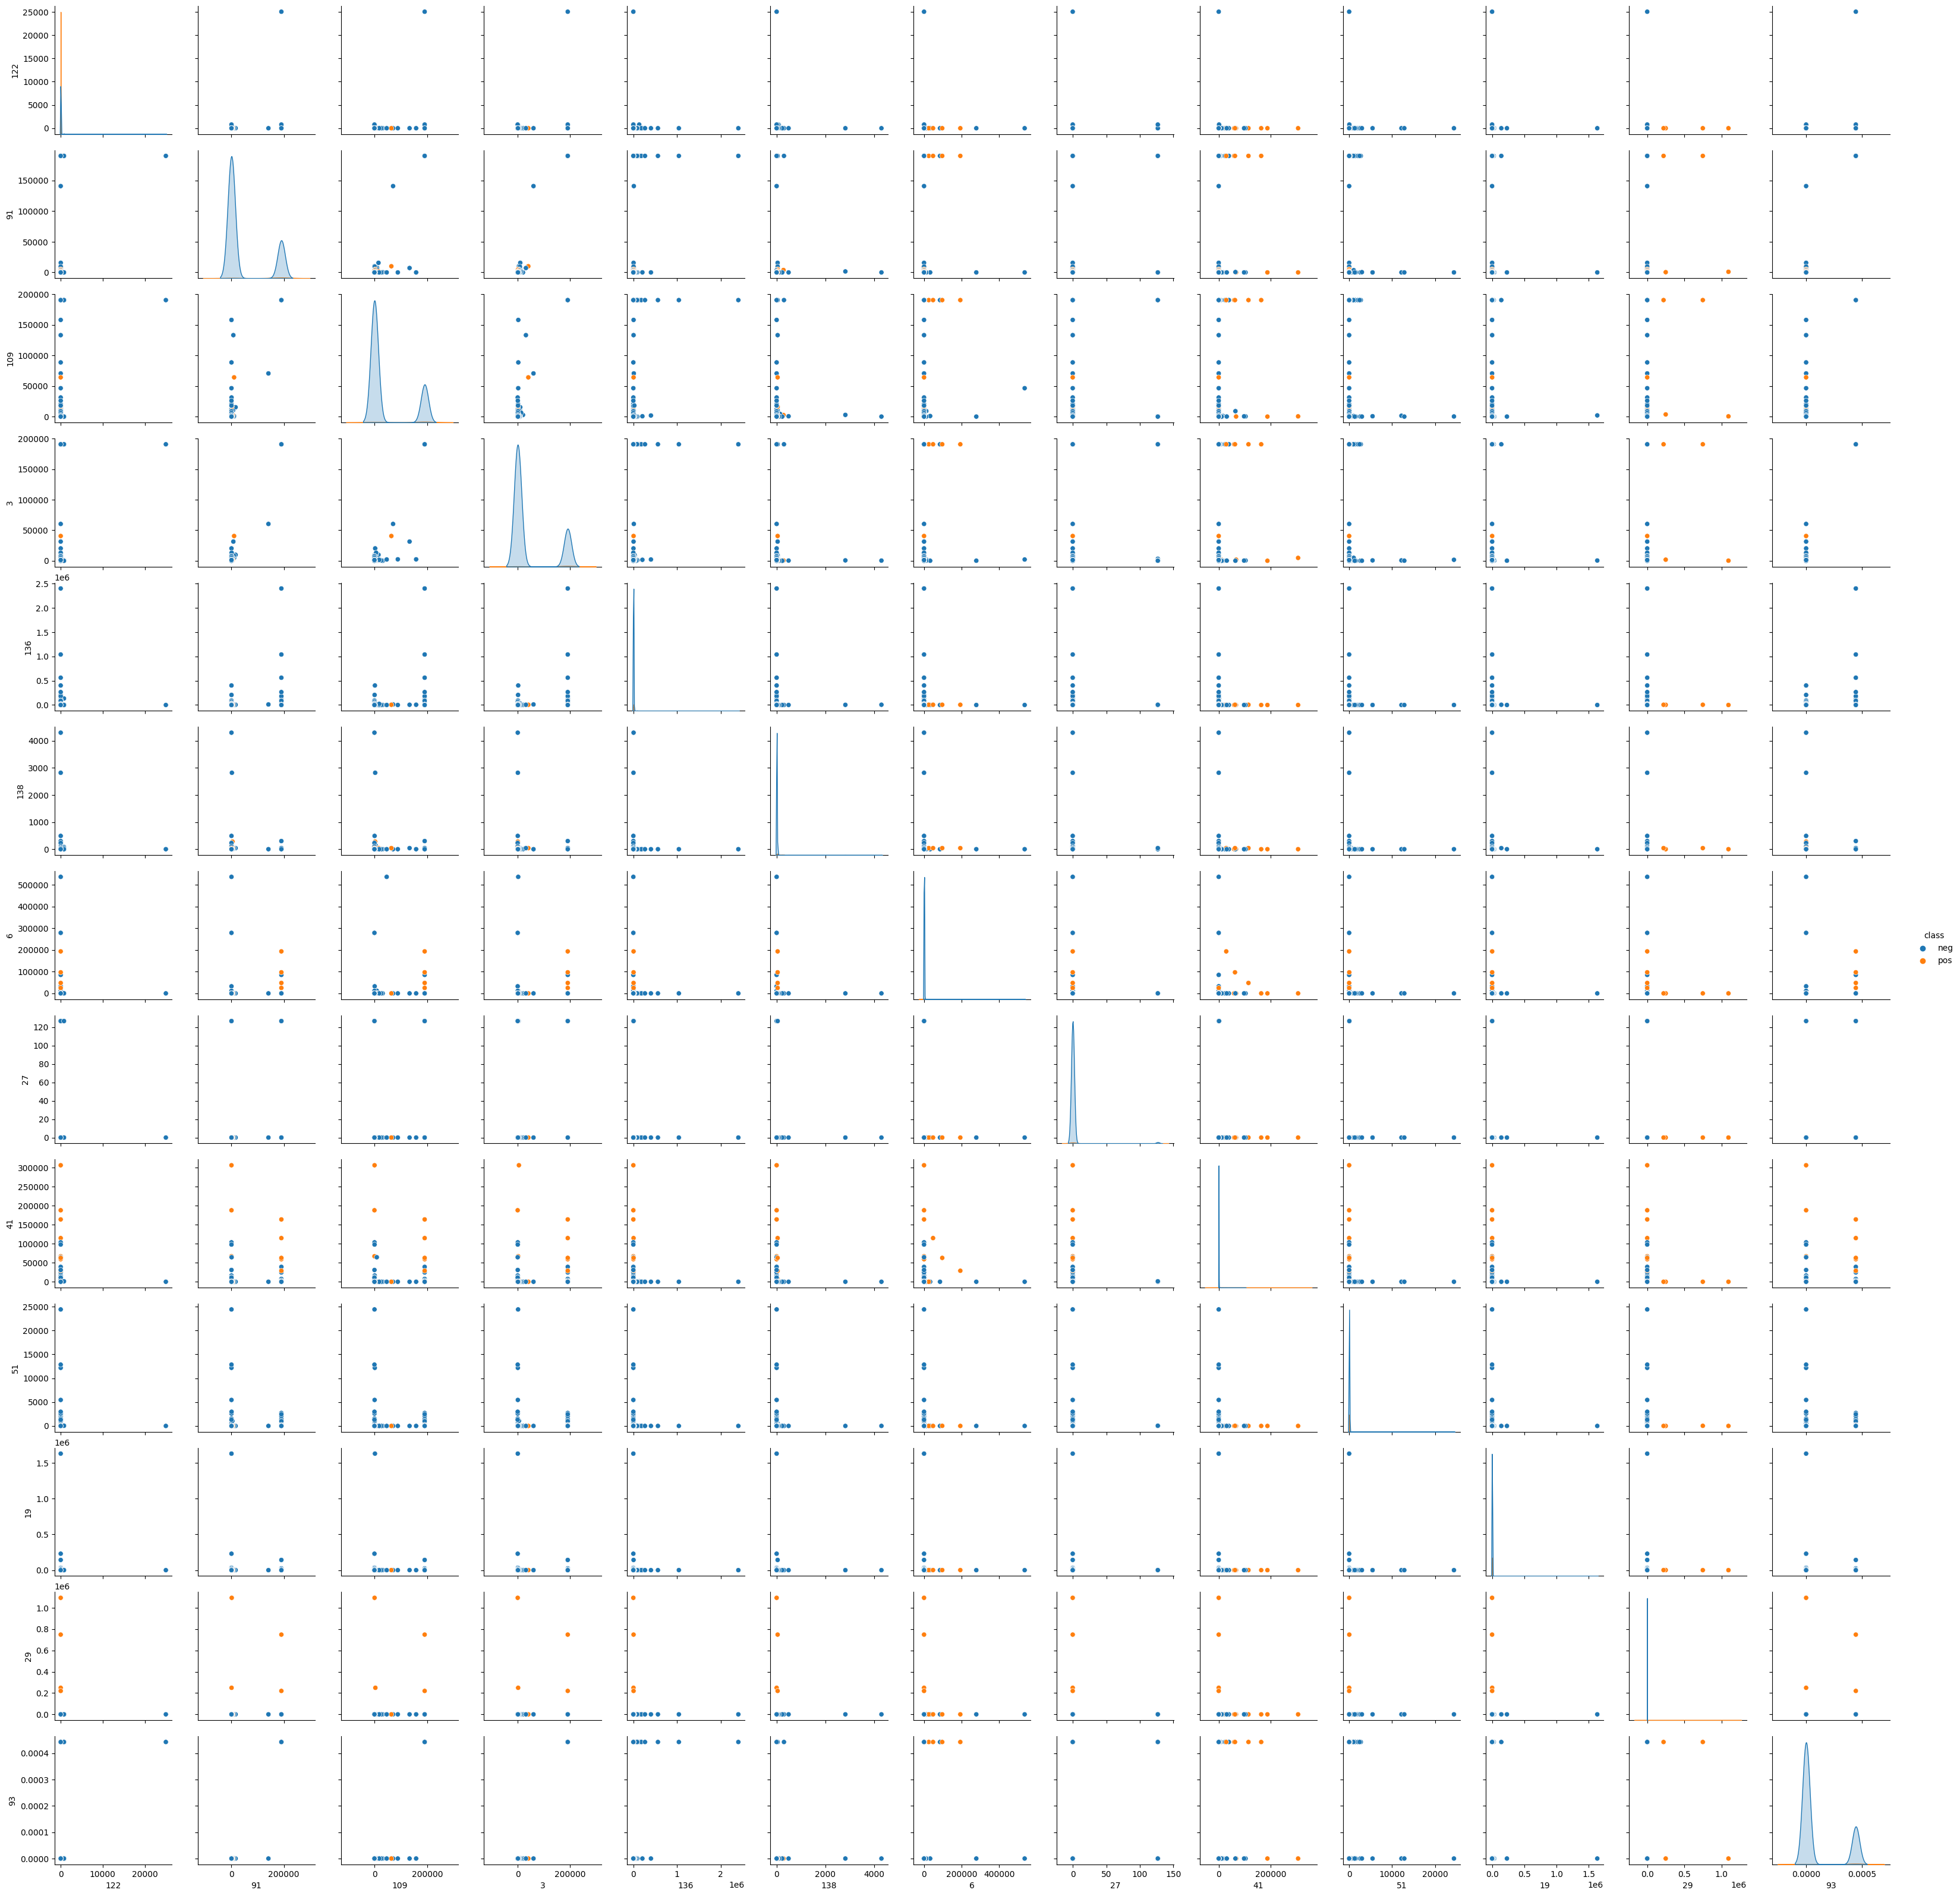

In [50]:
# The plot_kws and diag_kws parameters 
# accept dicts of keyword arguments to customize the off-diagonal and diagonal plots, respectively
'''
Notice that I randomly choose 6000 samples from the 60k samples to draw this pariplot since  my computer runs about
20 minutes on 60k data but still cannot plot the graph

'''
warnings.filterwarnings("ignore")

train_features.loc[:,'class'] = y_train
sns.pairplot(train_features.sample(frac=0.1), hue='class')
plt.show()

#### It's very hard to draw a conclusion about significance of those features just by scatter plots. I need more analysis to draw this conclusion.

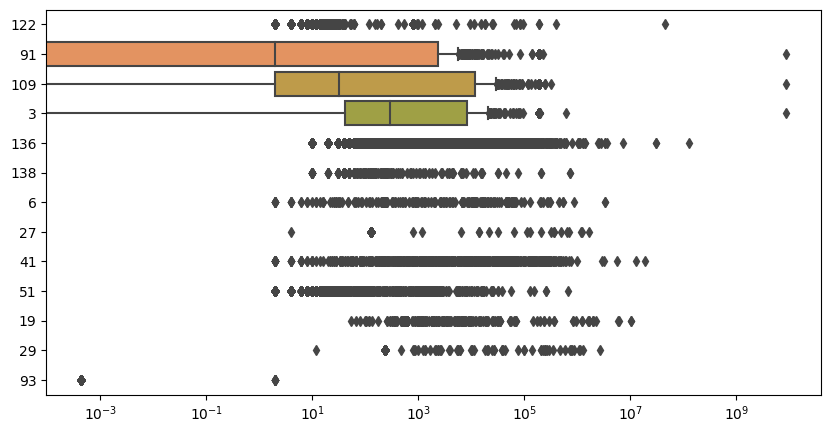

In [67]:
# https://seaborn.pydata.org/generated/seaborn.boxplot.html
fig, axes = plt.subplots(figsize=(10, 5))
box = sns.boxplot(data=train_features, orient='h', ax=axes)
# change the x-axis sacle  
box.set(xscale="log")
plt.show()

#### (v) Is this data set imbalanced?

In [74]:
print('Train Data')
print(y_train.value_counts())

Train Data
neg    59000
pos     1000
Name: class, dtype: int64


In [75]:
print('Test Data')
print(y_test.value_counts())

Test Data
neg    15625
pos      375
Name: class, dtype: int64


#### We have much more data points in "neg" class than in  "pos" class in both train and test datasets. Therefore, this dataset is imbalanced.

### (c) Train a random forest

In [280]:
# converts neg and pos, to 0s and 1s

y_new_train = y_train.map({'neg':0,'pos':1})
y_new_test = y_test.map({'neg':0,'pos':1})

In [281]:
# https://www.datacamp.com/tutorial/random-forests-classifier-python

# Random Forest model
# RandomizedSearchCV: randomly search parameters within a range per hyperparameter
# n_estimators: the number of decision trees in the forest. 
# max_depth: the maximum depth of each decision tree in the forest. 
param_dist = {'n_estimators': randint(10,30),
              'max_depth': randint(1,5)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)
# Fit the random search object to the data
rand_search.fit(X_train, y_new_train)

# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)


Best hyperparameters: {'max_depth': 4, 'n_estimators': 11}


In [282]:
RF_model = RandomForestClassifier(n_estimators=22, max_depth=4, random_state=1, oob_score=True)
RF_model.fit(X_train, y_new_train)
y_train_predict = RF_model.predict(X_train)


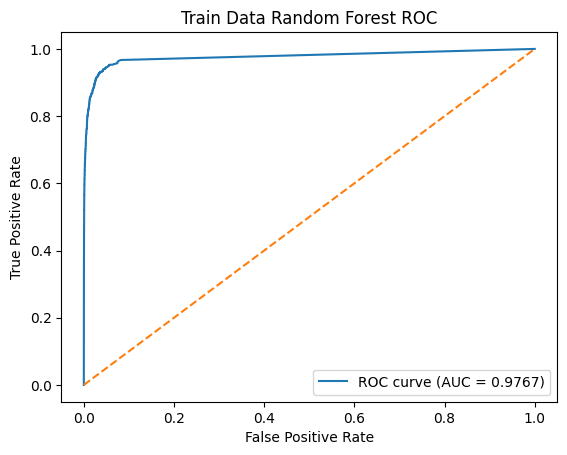

Train Data Confusion Matrix:
[[58967    33]
 [  531   469]]
Misclassification rate is: 0.009399999999999964
Out of Bag error is: 0.010666666666666713


In [283]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html

# draw ROC and AUC

yscore = RF_model.predict_proba(X_train)[:, 1]
yscore

# Compute ROC and AUC
fpr, tpr, thresholds = roc_curve(y_new_train, yscore)
# calaulate AUC value
roc_auc = auc(fpr,tpr)
roc_auc

plt.plot(fpr, tpr, label='ROC curve (AUC = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Train Data Random Forest ROC')
plt.legend(loc="lower right")
plt.show()

# calculate confusion matrix
confusionMatrix = confusion_matrix(y_new_train, y_train_predict)
print('Train Data Confusion Matrix:')
print(confusionMatrix)

# misclassification rate
print('Misclassification rate is:', 1-RF_model.score(X_train, y_new_train))

# calculate out of bag error
print('Out of Bag error is:', 1-RF_model.oob_score_)

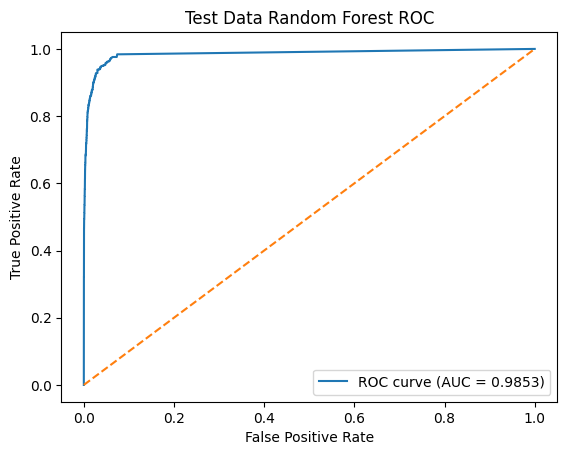

Test Data Confusion Matrix:
[[15618     7]
 [  215   160]]
Misclassification rate is: 0.01387499999999997
Out of Bag error is: 0.010666666666666713


In [284]:
y_test_predict = RF_model.predict(X_test)

# draw ROC and AUC

yscore = RF_model.predict_proba(X_test)[:, 1]
yscore

# Compute ROC and AUC
fpr, tpr, thresholds = roc_curve(y_new_test, yscore)
# calaulate AUC value
roc_auc = auc(fpr,tpr)
roc_auc

plt.plot(fpr, tpr, label='ROC curve (AUC = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test Data Random Forest ROC')
plt.legend(loc="lower right")
plt.show()

# calculate confusion matrix
confusionMatrix = confusion_matrix(y_new_test, y_test_predict)
print('Test Data Confusion Matrix:')
print(confusionMatrix)

# misclassification rate
print('Misclassification rate is:', 1-RF_model.score(X_test, y_new_test))

# calculate out of bag error
print('Out of Bag error is:', 1-RF_model.oob_score_)

#### Comparing to the maisclassification rate (test error) for the test data, the out of bag error is smaller.

### (d) Research class imbalance in random forest

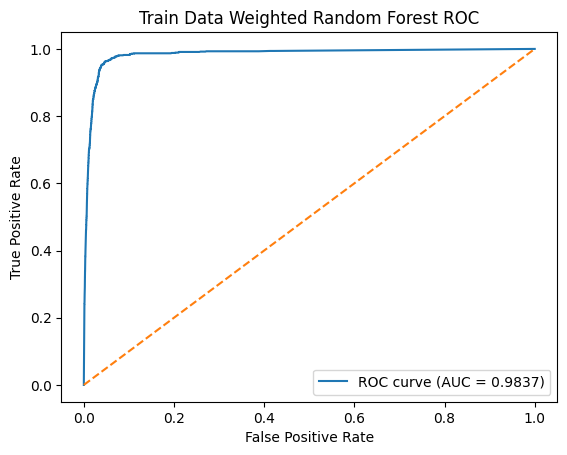

Train Data Confusion Matrix:
[[56071  2929]
 [   37   963]]
Misclassification rate is: 0.04943333333333333
Out of Bag error is: 0.05036666666666667


In [285]:
# https://medium.com/sfu-cspmp/surviving-in-a-random-forest-with-imbalanced-datasets-b98b963d52eb

# build random forest model with balanced

RF_model = RandomForestClassifier(n_estimators=22, max_depth=4, random_state=1, oob_score=True, class_weight='balanced')
RF_model.fit(X_train, y_new_train)
y_train_predict = RF_model.predict(X_train)

# draw ROC and AUC for tain data
yscore = RF_model.predict_proba(X_train)[:, 1]
yscore

# Compute ROC and AUC
fpr, tpr, thresholds = roc_curve(y_new_train, yscore)
# calaulate AUC value
roc_auc = auc(fpr,tpr)
roc_auc

plt.plot(fpr, tpr, label='ROC curve (AUC = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Train Data Weighted Random Forest ROC')
plt.legend(loc="lower right")
plt.show()

# calculate confusion matrix
confusionMatrix = confusion_matrix(y_new_train, y_train_predict)
print('Train Data Confusion Matrix:')
print(confusionMatrix)

# misclassification rate
print('Misclassification rate is:', 1-RF_model.score(X_train, y_new_train))

# calculate out of bag error
print('Out of Bag error is:', 1-RF_model.oob_score_)

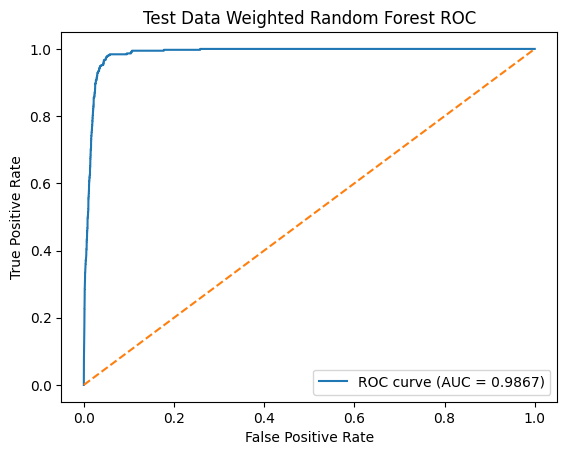

Test Data Confusion Matrix:
[[15618     7]
 [  215   160]]
Misclassification rate is: 0.04662500000000003
Out of Bag error is: 0.05036666666666667


In [286]:
# draw ROC and AUC for test data

yscore = RF_model.predict_proba(X_test)[:, 1]
yscore

# Compute ROC and AUC
fpr, tpr, thresholds = roc_curve(y_new_test, yscore)
# calaulate AUC value
roc_auc = auc(fpr,tpr)
roc_auc

plt.plot(fpr, tpr, label='ROC curve (AUC = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test Data Weighted Random Forest ROC')
plt.legend(loc="lower right")
plt.show()

# calculate confusion matrix
confusionMatrix = confusion_matrix(y_new_test, y_test_predict)
print('Test Data Confusion Matrix:')
print(confusionMatrix)

# misclassification rate
print('Misclassification rate is:', 1-RF_model.score(X_test, y_new_test))

# calculate out of bag error
print('Out of Bag error is:', 1-RF_model.oob_score_)

#### Both misclassification rates and out of bag errors are higher in the weighted random forest model than that in the forest model in problem (c). <br>Test data itself is imbalanced at around a 1:40 ratio, while the training data is imbalanced at 1:60. So it is possible that model fit on balanced data might produce higher test error and oob error. 

### (e) XGBoost and Model Trees

In [126]:
# https://xgboost.readthedocs.io/en/stable/python/examples/predict_first_ntree.html
# https://xgboost.readthedocs.io/en/stable/python/python_api.html#xgboost.XGBRFClassifier
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

xgb_model = xgb.XGBClassifier(n_estimators=22, max_depth=4, eta=1)
params = {'alpha': [0.001, 0.01, 0.1, 1]}

# 5 folds
clf = RandomizedSearchCV(estimator = xgb_model,
                         param_distributions = params,
                         cv = 5,
                         scoring='accuracy')
clf.fit(X_train, y_new_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False, eta=1,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,
                                           max_cat_threshold=None,
    

In [127]:
print("Best Params", clf.best_params_)
print(clf.best_estimator_)

Best Params {'alpha': 1}
XGBClassifier(alpha=1, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eta=1, eval_metric=None,
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=22, n_jobs=None,
              num_parallel_tree=None, ...)


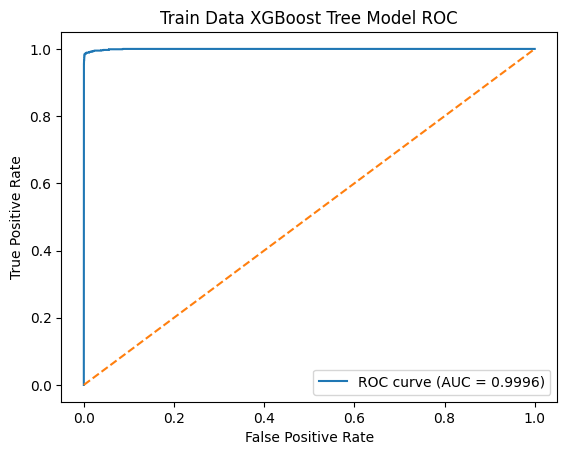

Train Data Confusion Matrix:
[[58994     6]
 [   57   943]]
Misclassification rate is: 0.0010499999999999954


In [136]:
xgb_best_model = clf.best_estimator_

xgb_best_model.fit(X_train, y_new_train)
y_train_predict = xgb_best_model.predict(X_train)

# draw ROC and AUC for tain data
yscore = xgb_best_model.predict_proba(X_train)[:, 1]
yscore

# Compute ROC and AUC
fpr, tpr, thresholds = roc_curve(y_new_train, yscore)
# calaulate AUC value
roc_auc = auc(fpr,tpr)
roc_auc

plt.plot(fpr, tpr, label='ROC curve (AUC = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Train Data XGBoost Tree Model ROC')
plt.legend(loc="lower right")
plt.show()

# calculate confusion matrix
confusionMatrix = confusion_matrix(y_new_train, y_train_predict)
print('Train Data Confusion Matrix:')
print(confusionMatrix)

# misclassification rate
print('Misclassification rate is:', 1-xgb_best_model.score(X_train, y_new_train))

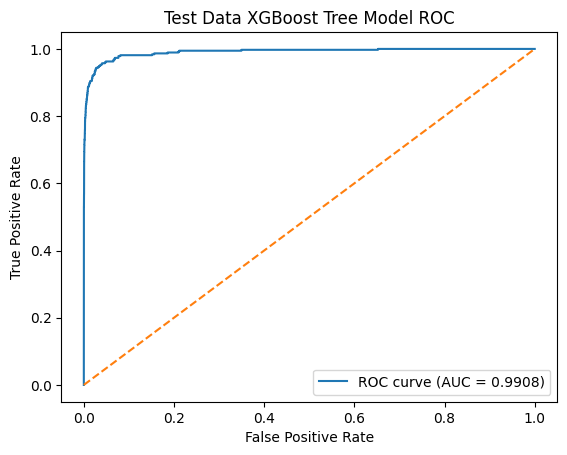

Test Data Confusion Matrix:
[[15618     7]
 [  215   160]]
Misclassification rate is: 0.00824999999999998


In [137]:
# draw ROC and AUC for test data

yscore = xgb_best_model.predict_proba(X_test)[:, 1]
yscore

# Compute ROC and AUC
fpr, tpr, thresholds = roc_curve(y_new_test, yscore)
# calaulate AUC value
roc_auc = auc(fpr,tpr)
roc_auc

plt.plot(fpr, tpr, label='ROC curve (AUC = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test Data XGBoost Tree Model ROC')
plt.legend(loc="lower right")
plt.show()

# calculate confusion matrix
confusionMatrix = confusion_matrix(y_new_test, y_test_predict)
print('Test Data Confusion Matrix:')
print(confusionMatrix)

# misclassification rate
print('Misclassification rate is:', 1-xgb_best_model.score(X_test, y_new_test))


### (f) Use SMOTE to pre-process your data

In [191]:
# https://medium.com/sfu-cspmp/surviving-in-a-random-forest-with-imbalanced-datasets-b98b963d52eb
# https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/
# https://www.analyticsvidhya.com/blog/2020/10/overcoming-class-imbalance-using-smote-techniques/
# https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html



counter = Counter(y_new_train)
print('Before', counter)

# transform the dataset
oversample = SMOTE()
X_smote_train, y_smote_train = oversample.fit_resample(X_train, y_new_train)
counter = Counter(y_smote_train)
print('After', counter)


Before Counter({0: 59000, 1: 1000})
After Counter({0: 59000, 1: 59000})


In [192]:

smote_train = pd.DataFrame(X_smote_train)
smote_train.loc[:,'class'] = y_smote_train
smote_train


,0,1,2,3,4,5,6,7,8,9,...,161,162,163,164,165,166,167,168,169,class
0,7.669800e+04,0.713189,2.130706e+09,280.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,...,4.933840e+05,7.210440e+05,4.697920e+05,3.391560e+05,1.579560e+05,7.322400e+04,0.000000,0.000000,0.000000,0
1,3.305800e+04,0.713189,0.000000e+00,190620.639314,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,...,1.780640e+05,2.933060e+05,2.454160e+05,1.336540e+05,8.114000e+04,9.757600e+04,1500.000000,0.000000,0.000000,0
2,4.104000e+04,0.713189,2.280000e+02,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,...,1.598120e+05,4.239920e+05,4.095640e+05,3.207460e+05,1.580220e+05,9.512800e+04,514.000000,0.000000,0.000000,0
3,1.200000e+01,0.000000,7.000000e+01,66.000000,0.000000,10.000000,0.000000,0.000000,0.000000e+00,3.180000e+02,...,4.600000e+01,5.800000e+01,4.400000e+01,1.000000e+01,0.000000e+00,0.000000e+00,0.000000,4.000000,32.000000,0
4,6.087400e+04,0.713189,1.368000e+03,458.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,...,2.297900e+05,4.052980e+05,3.471880e+05,2.869540e+05,3.115600e+05,4.339540e+05,1218.000000,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117995,6.801718e+05,0.713189,3.560143e+08,190620.639314,6.819130,11.006817,0.000000,0.000000,0.000000e+00,0.000000e+00,...,2.934420e+06,4.991802e+06,4.087524e+06,3.308988e+06,1.954462e+06,2.551939e+06,70265.240162,0.090579,0.212756,1
117996,6.897095e+05,0.388377,8.370439e+02,413.837295,7.623902,20.693448,0.000000,0.000000,8.357975e+03,5.017170e+05,...,1.748084e+05,4.521736e+05,1.871098e+06,9.039301e+05,3.056270e+05,1.217973e+04,0.000000,0.000000,6.534773,1
117997,9.813030e+05,0.713189,3.560143e+08,190620.639314,6.819130,11.006817,3120.214125,164359.866006,1.787445e+06,1.037762e+07,...,1.740926e+06,3.919700e+06,1.817759e+07,5.434820e+06,5.054419e+06,2.822913e+05,88.798455,0.090579,0.212756,1
117998,3.338250e+05,0.713189,3.560143e+08,190620.639314,6.819130,11.006817,0.000000,0.000000,0.000000e+00,0.000000e+00,...,1.094267e+06,1.334563e+06,4.225063e+05,1.062251e+05,4.627047e+04,2.197650e+04,122.074364,0.090579,0.212756,1


In [249]:
# https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/
# https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html
# https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

In [271]:
'''
for param in grid_model.get_params().keys():
    print(param)
'''

'\nfor param in grid_model.get_params().keys():\n    print(param)\n'

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [275]:
xgb_model = xgb.XGBClassifier(objective = 'binary:logistic')
pipeline = Pipeline(steps = [['smote', SMOTE(random_state=1)],
                                ['xgb', xgb_model]])

params = {'smote__k_neighbors': [3,5,7],'xgb__reg_alpha': [0.001, 0.01, 0.1, 1.0]}
grid_model = GridSearchCV(pipeline, param_grid = params, cv = 5, scoring='roc_auc')
grid_model.fit(X_smote_train, y_smote_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[['smote', SMOTE(random_state=1)],
                                       ['xgb',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None, gpu_id=None,
                                 

In [277]:
print('Best alpha', grid_model.best_params_)
print(grid_model.best_estimator_)

Best alpha {'smote__k_neighbors': 3, 'xgb__reg_alpha': 0.001}
Pipeline(steps=[('smote', SMOTE(k_neighbors=3, random_state=1)),
                ['xgb',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
 

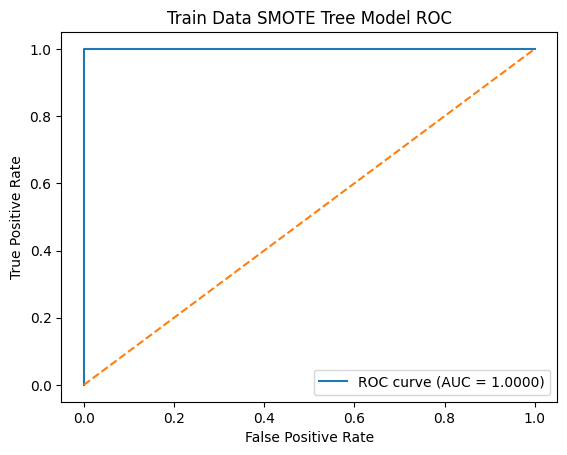

Train Data Confusion Matrix:
[[59000     0]
 [    0 59000]]
Misclassification rate is: 0.0


In [278]:
grid_best_model = grid_model.best_estimator_

grid_best_model.fit(X_smote_train, y_smote_train)
y_train_predict = grid_best_model.predict(X_smote_train)

# draw ROC and AUC for tain data
yscore = grid_best_model.predict_proba(X_smote_train)[:, 1]
yscore

# Compute ROC and AUC
fpr, tpr, thresholds = roc_curve(y_smote_train, yscore)
# calaulate AUC value
roc_auc = auc(fpr,tpr)
roc_auc

plt.plot(fpr, tpr, label='ROC curve (AUC = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Train Data SMOTE Tree Model ROC')
plt.legend(loc="lower right")
plt.show()

# calculate confusion matrix
confusionMatrix = confusion_matrix(y_smote_train, y_train_predict)
print('Train Data Confusion Matrix:')
print(confusionMatrix)

# misclassification rate
print('Misclassification rate is:', 1-grid_best_model.score(X_smote_train, y_smote_train))

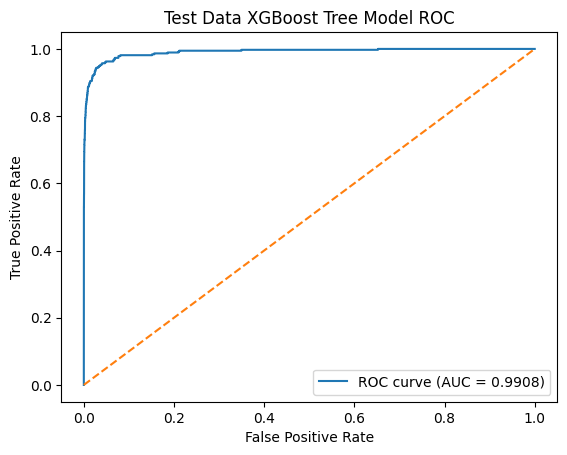

Test Data Confusion Matrix:
[[15618     7]
 [  215   160]]
Misclassification rate is: 0.00824999999999998


In [279]:
# draw ROC and AUC for test data

yscore = xgb_best_model.predict_proba(X_test)[:, 1]
yscore

# Compute ROC and AUC
fpr, tpr, thresholds = roc_curve(y_new_test, yscore)
# calaulate AUC value
roc_auc = auc(fpr,tpr)
roc_auc

plt.plot(fpr, tpr, label='ROC curve (AUC = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test Data XGBoost Tree Model ROC')
plt.legend(loc="lower right")
plt.show()

# calculate confusion matrix
confusionMatrix = confusion_matrix(y_new_test, y_test_predict)
print('Test Data Confusion Matrix:')
print(confusionMatrix)

# misclassification rate
print('Misclassification rate is:', 1-xgb_best_model.score(X_test, y_new_test))

#### The SMOTE case has a much lower test error than the uncompensated case. The SMOTE case has 0 train error while the uncompendated case cannot.

## 2. ISLR 6.6.3

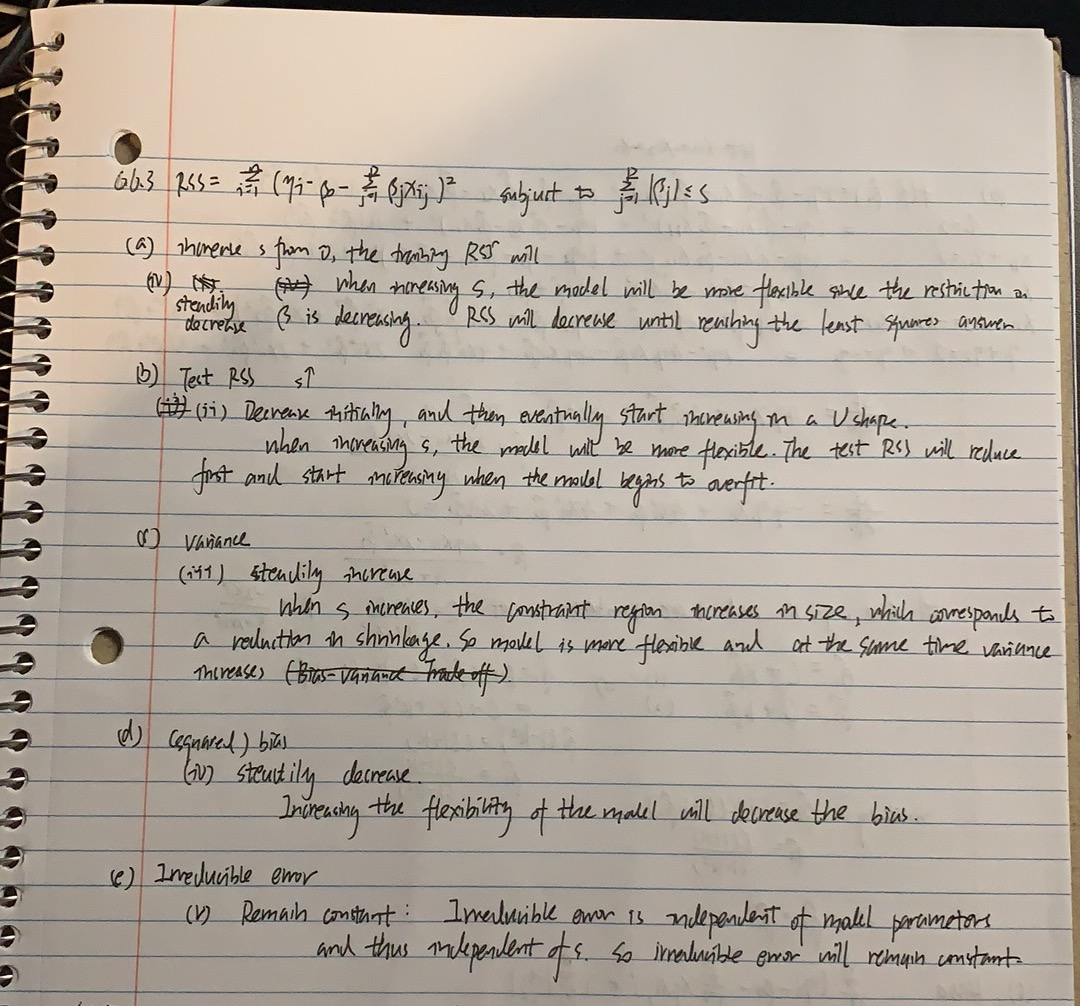

## 3. ISLR 6.6.5

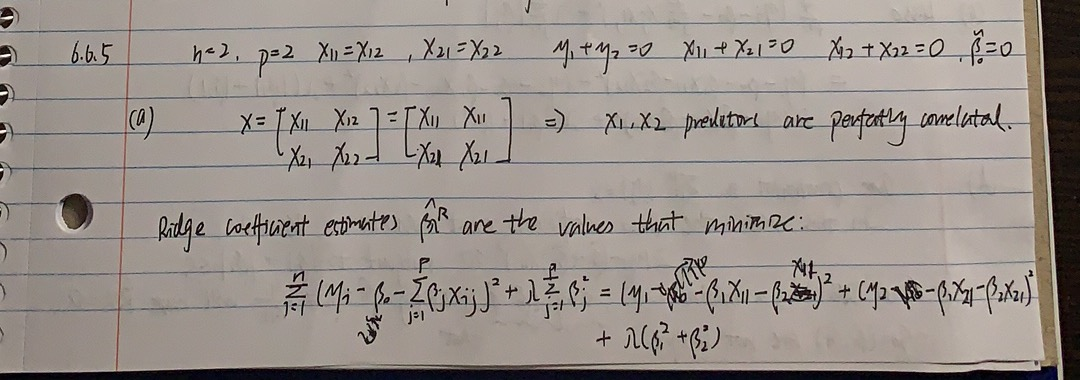

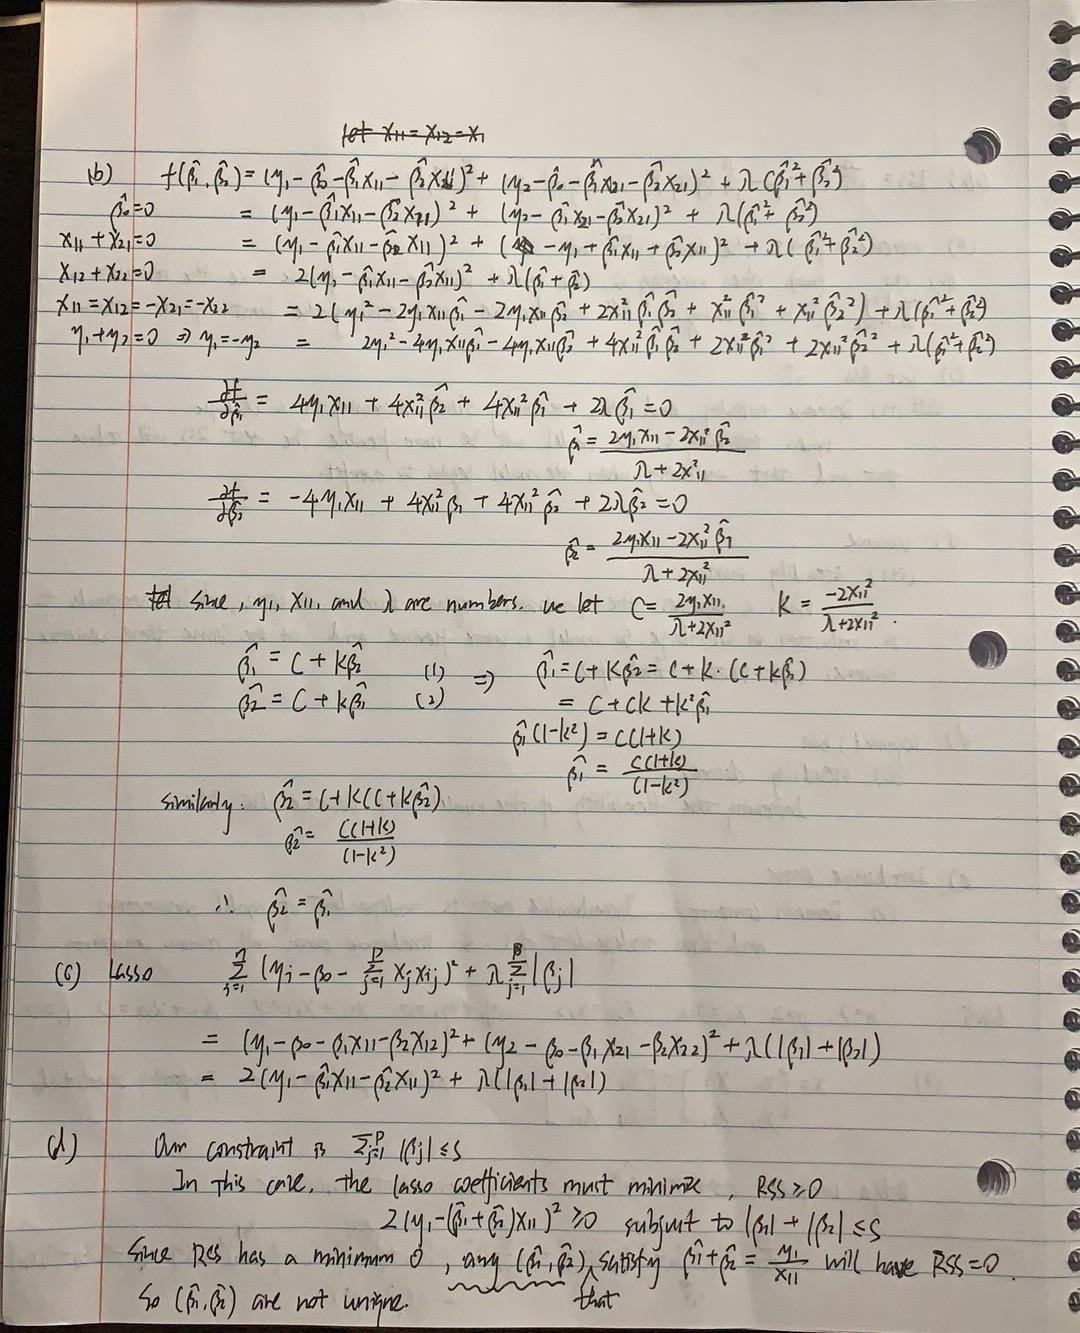

## 4. ISLR 8.4.5

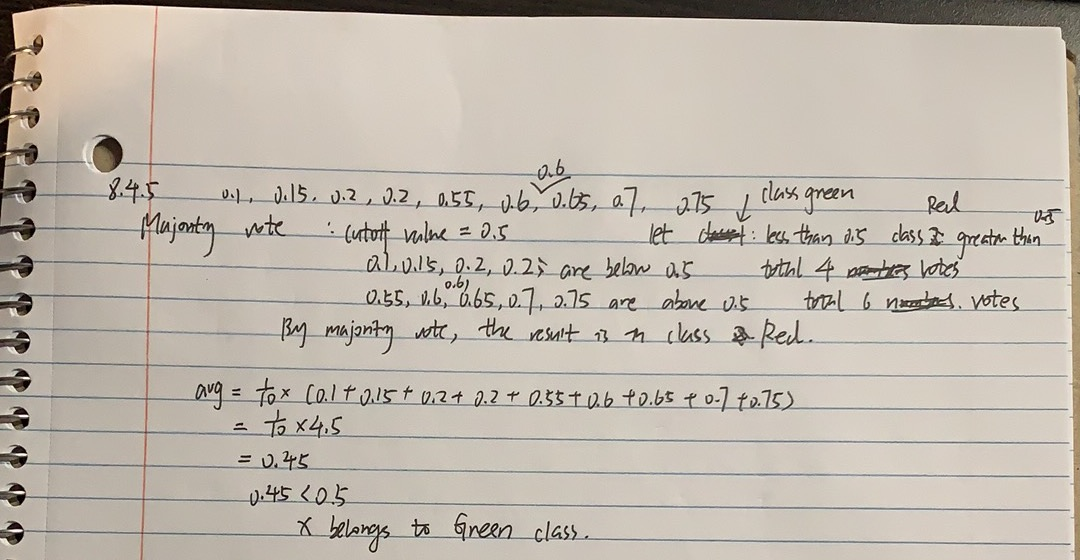

## 5. ISLR 9.7.3

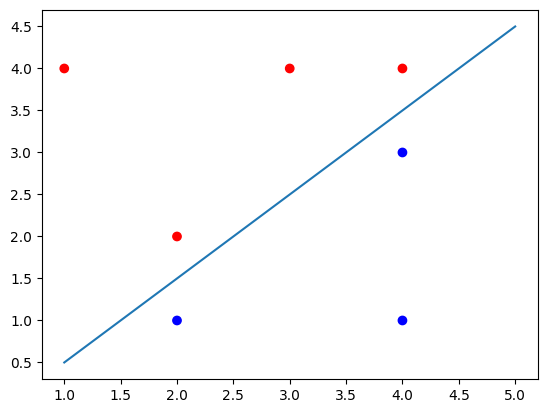

In [296]:
sample_dict = {'x1' : [3, 2, 4, 1, 2, 4, 4], 
           'x2' : [4, 2, 4, 4, 1, 3, 1], 
           'y' : ['red', 'red', 'red', 'red', 'blue', 'blue', 'blue']}
df = pd.DataFrame.from_dict(sample_dict)
df

# x2 = x1-0.5
x = [1,2,3,4,5]
y = [0.5,1.5, 2.5, 3.5, 4.5]
plt.figure()
plt.scatter(df['x1'], df['x2'], c = df['y'])
plt.plot(x, y)
plt.show()

#### From the figure above, the optimal separating hyperplane is a line that connects a point between (2,1)and(2,2), and a point between (4,3)and (4,4). The optimal hyperplane is x2 = x1 - 0.5. 

#### Classify to Red if x2-x1+0.5 > 0, classify to blue if x2-x1+0.5 < 0

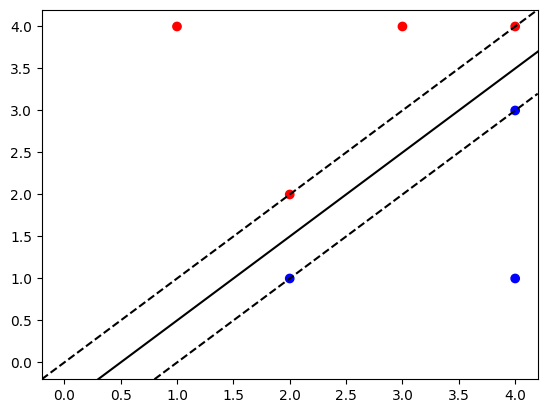

In [314]:
# (d)

plt.scatter(df['x1'], df['x2'], c = df['y'])
# -0.5+X1-X2=0
plt.axline((0.5,0), slope=1, color="black", linestyle="-")

# Sketch Margin
plt.axline((0,0), slope=1, color="black", linestyle="--")
plt.axline((1,0), slope=1, color="black", linestyle="--")

plt.show()

#### The dash lines indicates the maximal margin

#### (e) The support vectors are points (2,1), (2,2), (4,3) and  (4,4)

#### (f) The seventh observation is not a support vector. Hence, a slight movement of the seventh observation would not affect the maximal margin hyperplane

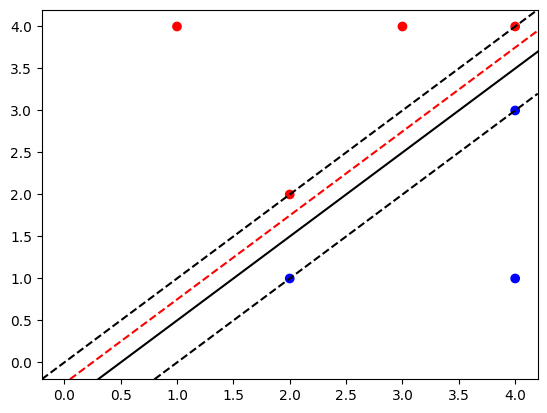

In [316]:
# (g)
plt.scatter(df['x1'], df['x2'], c = df['y'])
# -0.5+X1-X2=0
plt.axline((0.5,0), slope=1, color="black", linestyle="-")

# Sketch Margin
plt.axline((0,0), slope=1, color="black", linestyle="--")
plt.axline((1,0), slope=1, color="black", linestyle="--")

# sketch a hyperplane that is not the optimal separating hyperplane
plt.axline((0.25,0), slope=1, color="red", linestyle="--")

plt.show()

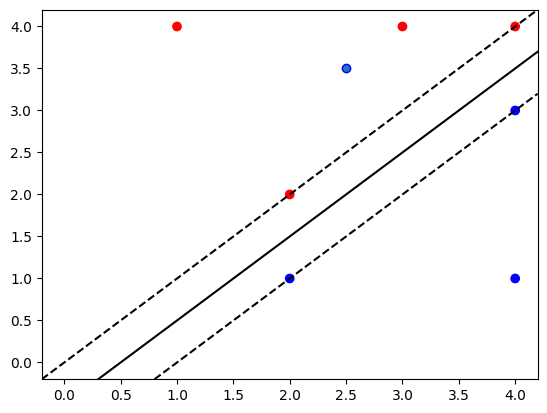

In [320]:
# h
plt.scatter(df['x1'], df['x2'], c = df['y'])
# -0.5+X1-X2=0
plt.axline((0.5,0), slope=1, color="black", linestyle="-")

# Sketch Margin
plt.axline((0,0), slope=1, color="black", linestyle="--")
plt.axline((1,0), slope=1, color="black", linestyle="--")

# add a blue point at (2.5,3.5)
plt.plot(2.5, 3.5, marker="o", markeredgecolor="blue")

### Reference:

https://rpubs.com/lmorgan95/ISLR_CH6_Solutions<br>
https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html<br>
https://scikit-learn.org/stable/modules/impute.html<br>
https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.htmlhttps://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html<br>
https://medium.com/sfu-cspmp/surviving-in-a-random-forest-with-imbalanced-datasets-b98b963d52eb<br>
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/<br>
https://www.analyticsvidhya.com/blog/2020/10/overcoming-class-imbalance-using-smote-techniques/<br>
https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html<br>
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/<br>
https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html<br>
https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html<br>
https://xgboost.readthedocs.io/en/stable/python/examples/predict_first_ntree.html<br>
https://xgboost.readthedocs.io/en/stable/python/python_api.html#xgboost.XGBRFClassifier<br>
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html<br>